In [85]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [86]:
from kineticmodel import SRTM_Zhou2003, SRTM_Lammertsma1996, SRTM_Gunn1997

In [87]:
import sys, os
sys.path.insert(0,os.pardir)
from tests.generate_test_data import generate_fakeTAC_SRTM

In [88]:
import numpy as np
np.random.seed(0)

import scipy as sp
import matplotlib.pyplot as plt
% matplotlib inline

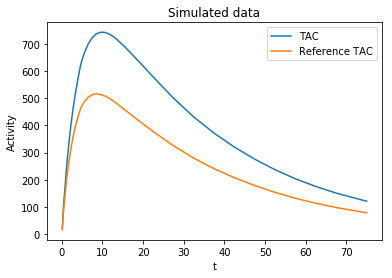

In [89]:
# generate noiseless fake data based on SRTM
BP = 0.5
R1 = 1.2
t, dt, TAC, refTAC = generate_fakeTAC_SRTM(BP, R1)

fig, ax = plt.subplots();
ax.plot(t, TAC, label='TAC');
ax.plot(t, refTAC, label='Reference TAC');
ax.set_xlabel('t');
ax.set_ylabel('Activity');
ax.set_title('Simulated data');
ax.legend();

In [90]:
# Initialize SRTM Lammerstma 1996 model
mdl_lammertsma = SRTM_Lammertsma1996(t, dt, TAC, refTAC, time_unit='min')

# fit model
mdl_lammertsma.fit();

# get model results
mdl_lammertsma.results

{'BP': array([ 0.48653447]),
 'R1': array([ 1.22034731]),
 'k2': array([ 0.36585587])}

In [91]:
mdl_gunn = SRTM_Gunn1997(t, dt, TAC, refTAC, time_unit='min')

mdl_gunn.fit()

mdl_gunn.results

{'BP': array([ 0.48665555]),
 'R1': array([ 1.22067952]),
 'k2': array([ 0.36490636])}

In [307]:
# Initialize SRTM Zhou 2003 model
mdl_zhou = SRTM_Zhou2003(t, dt, TAC, refTAC, time_unit='min')

mdl_zhou.fit();

mdl_zhou.results

{'BP': array([ 0.49975167]),
 'R1': array([ 1.20196883]),
 'R1_lrsc': array([ nan]),
 'k2': array([ 0.35754029]),
 'k2_lrsc': array([ nan]),
 'k2a': array([ 0.23839951]),
 'k2a_lrsc': array([ nan]),
 'noiseVar_eqDVR': array([ 0.04410682]),
 'noiseVar_eqR1': array([ 0.00250739])}

In [296]:
# Generate noisy simulations by adding normal noise -- I don't think this is a good way
pct_noise = np.array([0, 5, 10, 15, 20, 25, 30])

TAC_matrix = TAC + np.random.normal(0,np.outer(TAC,pct_noise/100).T)

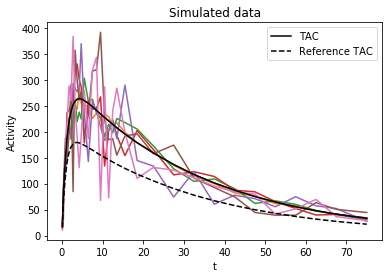

In [297]:
fig, ax = plt.subplots();
ax.plot(t, TAC_matrix.T, label='');
ax.plot(t, TAC, 'k-', label='TAC');
ax.plot(t, refTAC, 'k--', label='Reference TAC');
ax.set_xlabel('t');
ax.set_ylabel('Activity');
ax.set_title('Simulated data');
ax.legend();

Experiment using noisy TAC and noiseless reference TAC

In [298]:
# Initialize SRTM Lammerstma 1996 model
mdl_lammertsma = SRTM_Lammertsma1996(t, dt, TAC_matrix, refTAC, time_unit='min')

# fit model
mdl_lammertsma.fit();

# get model results
mdl_lammertsma.results

0it [00:00, ?it/s]

TAC shape:(7, 34)


7it [00:03,  2.21it/s]


{'BP': array([ 0.49424354,  0.49001415,  0.51137172,  0.45655438,  0.4818236 ,
         0.51879258,  0.38706173]),
 'R1': array([ 1.37144312,  1.35812921,  1.25296164,  1.43105993,  1.56776521,
         1.34453728,  1.49948449]),
 'k2': array([ 0.48671519,  0.37015681,  0.3656892 ,  2.        ,  2.        ,
         0.52534659,  0.27975829])}

In [299]:
# Initialize SRTM Zhou 2003 model
mdl_zhou = SRTM_Zhou2003(t, dt, TAC_matrix, refTAC, time_unit='min')

mdl_zhou.fit();

mdl_zhou.results

{'BP': array([ 0.50008519,  0.48949162,  0.50735411,  0.49307645,  0.37832063,
         0.49939768,  0.39081705]),
 'R1': array([ 1.21159295,  1.43883716,  1.46425731,  1.46502443,  1.41258576,
         1.53404839,  1.39739525]),
 'R1_lrsc': array([ nan,  nan,  nan,  nan,  nan,  nan,  nan]),
 'k2': array([ 1.16059185,  0.13705899,  0.05627651,  0.01907787,  0.00534368,
         0.0056873 ,  0.01862915]),
 'k2_lrsc': array([ nan,  nan,  nan,  nan,  nan,  nan,  nan]),
 'k2a': array([ 0.7736839 ,  0.09179643,  0.03715331,  0.01251775,  0.00395811,
         0.00406498,  0.01334404]),
 'k2a_lrsc': array([ nan,  nan,  nan,  nan,  nan,  nan,  nan]),
 'noiseVar_eqDVR': array([  2.03777753e-04,   5.95444755e+00,   5.73610162e+01,
          6.87593693e+01,   4.16616278e+02,   5.43613080e+02,
          1.09901412e+02]),
 'noiseVar_eqR1': array([  1.22013775e-04,   1.00336441e+00,   7.66668202e+00,
          1.28552759e+01,   3.49650478e+01,   3.70268729e+01,
          4.91540928e+01])}

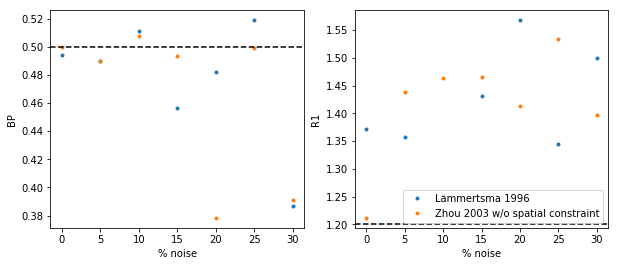

In [300]:
fig, axes = plt.subplots(1,2, figsize=(10,4));

axes[0].plot(pct_noise, mdl_lammertsma.results['BP'], '.', label='Lammertsma 1996');
axes[0].plot(pct_noise, mdl_zhou.results['BP'], '.', label='Zhou 2003 w/o spatial constraint');
axes[0].axhline(y=BP, color='k', linestyle='--');
axes[0].set_xlabel('% noise');
axes[0].set_ylabel('BP');
#axes[0].legend();

axes[1].plot(pct_noise, mdl_lammertsma.results['R1'], '.', label='Lammertsma 1996');
axes[1].plot(pct_noise, mdl_zhou.results['R1'], '.', label='Zhou 2003 w/o spatial constraint');
axes[1].axhline(y=R1, color='k', linestyle='--');
axes[1].set_xlabel('% noise');
axes[1].set_ylabel('R1');
axes[1].legend();